In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('Datasets/cleaned_data.csv')
df.head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA
0,2014-03-21,AS14.01,6.20,0.2,0.2,0.134050,17978.907000,6.0,0.0,3139.218,...,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050
1,2014-03-22,AS14.01,6.40,0.6,0.4,0.236880,6142.161000,3.0,1.0,731.429,...,21.076,0.0,0.000,98.143,439.632,37.305,0.000,0.000,117.621,0.190607
2,2014-03-23,AS14.01,6.80,0.2,0.8,0.142741,6773.832001,0.0,0.0,1286.246,...,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.386,30.086,0.171365
3,2014-03-24,AS14.01,6.00,0.8,0.0,0.078961,15047.351001,10.0,0.0,866.956,...,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922
4,2014-03-25,AS14.01,6.75,0.5,0.5,0.098374,21475.354999,0.0,1.0,1032.768,...,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708


# Feature engineering

## Amount of time spent on phone late at night (9 - 12 pm)
- total
- business related applications
- entertainment related
- etc

In [4]:
def new_origninal_dataset():
    original_dataset = pd.read_csv('Datasets/mood_smartphone.csv', index_col=0)
    print(original_dataset.tail())

    whole_df = original_dataset.pivot_table(index=['time', 'id'], columns='variable', aggfunc='sum', values='value')

    whole_df['date'] = whole_df.index.get_level_values(0)
    whole_df['date'] = pd.to_datetime(whole_df['date'])

    whole_df['time'] = whole_df['date'].apply(lambda x: x.time())
    whole_df['date'] = whole_df['date'].apply(lambda x: x.date())

    # Convert time column to datetime format with a fixed date as a placeholder
    whole_df['hour_of_day_placeholder'] = pd.to_datetime(whole_df['time'].apply(lambda x: datetime.datetime(1900, 1, 1, x.hour)))

    return whole_df#.groupby(['id', 'date']).sum().reset_index()

whole_df = new_origninal_dataset()

whole_df.tail()

              id                     time        variable   value
2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431


,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,date,time,hour_of_day
time,id,,,,,,,,,,,,,,,,,,,,,
2014-06-08 11:03:34.453,AS14.24,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:03:34.453000,1900-01-01 11:00:00
2014-06-08 11:04:20.233,AS14.24,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:20.233000,1900-01-01 11:00:00
2014-06-08 11:04:36.299,AS14.24,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:36.299000,1900-01-01 11:00:00
2014-06-08 11:04:46.335,AS14.24,NaN,8.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:46.335000,1900-01-01 11:00:00
2014-06-09 00:00:00.000,AS14.24,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-09,00:00:00,1900-01-01 00:00:00


In [5]:
# def add_late_night_use(df, start_hour=21, end_hour=23):
#     df['late_night_use'] = df['time'].apply(lambda x: x.hour in range(start_hour, end_hour+1))
#     return df

# add_late_night_use(whole_df).tail(5)

In [6]:
def add_late_night_use(df:pd.DataFrame, feature:str=None, start_hour=21, end_hour=23):

    new_feature_name = f'late_night_{feature}_use' if feature else 'late_night_use'

    if feature is None:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour))
    else:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour)) & (df[feature] > 0)

    # Create a new column based on the mask
    df[new_feature_name] = False
    df.loc[mask, new_feature_name] = True

    return df


#do for all categories and print results
categories = [x for x in df.columns if x[:3] == 'app'] + ['call', 'sms', 'screen']

for category in categories:
    whole_df = add_late_night_use(whole_df, category)
    print('-'*50, f'\n{category}\n', whole_df[f'late_night_{category}_use'].value_counts())
whole_df.tail()

------------------------------ 
appCat.builtin
 False    344163
True      14763
Name: late_night_appCat.builtin_use, dtype: int64
------------------------------ 
appCat.communication
 False    346265
True      12661
Name: late_night_appCat.communication_use, dtype: int64
------------------------------ 
appCat.entertainment
 False    354181
True       4745
Name: late_night_appCat.entertainment_use, dtype: int64
------------------------------ 
appCat.finance
 False    358738
True        188
Name: late_night_appCat.finance_use, dtype: int64
------------------------------ 
appCat.game
 False    358772
True        154
Name: late_night_appCat.game_use, dtype: int64
------------------------------ 
appCat.office
 False    357855
True       1071
Name: late_night_appCat.office_use, dtype: int64
------------------------------ 
appCat.other
 False    357448
True       1478
Name: late_night_appCat.other_use, dtype: int64
------------------------------ 
appCat.social
 False    355013
True       3913

,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,late_night_appCat.entertainment_use,late_night_appCat.finance_use,late_night_appCat.game_use,late_night_appCat.office_use,late_night_appCat.other_use,late_night_appCat.social_use,late_night_appCat.travel_use,late_night_appCat.unknown_use,late_night_appCat.weather_use,late_night_appCat.utilities_use
time,id,,,,,,,,,,,,,,,,,,,,,
2014-06-08 11:03:34.453,AS14.24,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:20.233,AS14.24,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:36.299,AS14.24,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:46.335,AS14.24,NaN,8.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-09 00:00:00.000,AS14.24,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA
0,2014-03-21,AS14.01,6.20000,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050
1,2014-03-22,AS14.01,6.40000,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,21.076,0.0,0.000,98.143,439.632,37.305,0.000,0.000,117.621,0.190607
2,2014-03-23,AS14.01,6.80000,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.386,30.086,0.171365
3,2014-03-24,AS14.01,6.00000,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922
4,2014-03-25,AS14.01,6.75000,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.00000,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,0.000,0.0,0.000,47.360,171.964,225.737,0.000,0.000,0.000,0.079928
1301,2014-06-06,AS14.24,7.50000,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.000,0.0,0.000,36.414,0.000,0.000,0.000,0.000,2.072,0.099847
1302,2014-06-07,AS14.24,8.00000,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,0.000,0.0,0.000,6.214,106.850,0.000,0.000,0.000,0.000,0.096582
1303,2014-06-08,AS14.24,6.50000,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,0.000,0.0,0.000,18.069,190.760,0.000,0.000,0.000,0.000,0.093478


## Since mood's correlation with valence, lets predict valence and provide as feature

<AxesSubplot:>

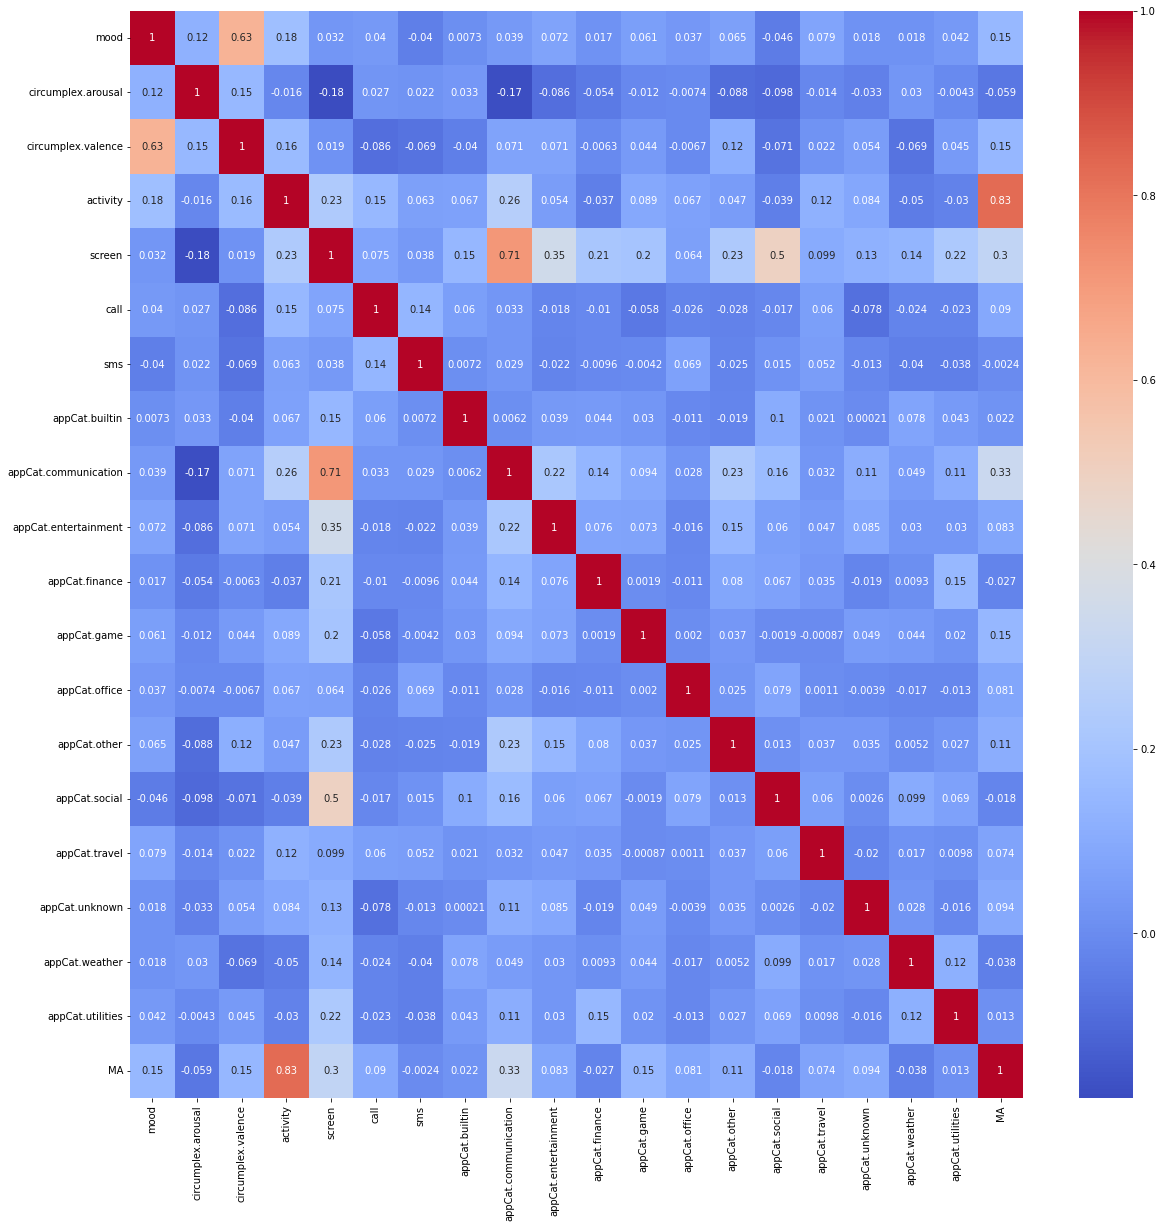

In [151]:
#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Adjust mood to classification problem
Transform mood from regression to classification problem
- round to integers

In [152]:
print(df['mood'].value_counts())
def round_feature(df:pd.DataFrame, feature:str):
    df[feature] = df[feature].round()
    return df

round_feature(df, 'mood')['mood'].value_counts()

7.000000    234
7.200000     97
6.800000     81
8.000000     74
7.400000     72
           ... 
9.750000      1
7.017741      1
7.341479      1
7.537883      1
7.136620      1
Name: mood, Length: 91, dtype: int64


7.0     664
8.0     330
6.0     257
5.0      24
9.0      16
4.0       8
10.0      3
3.0       2
11.0      1
Name: mood, dtype: int64

In [153]:
#nested cross validation

## Proportional changes

Predicting numbers may be more difficult than predicting changes. Added benefit is that the model may generalise better

In [154]:
def transform_to_relative_changes(df, feature):
    df[f'{feature}_relative_change'] = df[feature].pct_change()
    return df

transform_to_relative_changes(df, 'mood')

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,mood_relative_change
0,2014-03-21,AS14.01,6.0,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,0.0,172.206,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050,NaN
1,2014-03-22,AS14.01,6.0,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,0.0,0.000,98.143,439.632,37.305,0.000,0.000,117.621,0.190607,0.000000
2,2014-03-23,AS14.01,7.0,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,0.0,0.000,72.823,900.839,0.000,0.000,30.386,30.086,0.171365,0.166667
3,2014-03-24,AS14.01,6.0,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,0.0,3.010,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922,-0.142857
4,2014-03-25,AS14.01,7.0,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,0.0,0.000,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.0,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,0.0,0.000,47.360,171.964,225.737,0.000,0.000,0.000,0.079928,0.000000
1301,2014-06-06,AS14.24,8.0,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.0,0.000,36.414,0.000,0.000,0.000,0.000,2.072,0.099847,0.142857
1302,2014-06-07,AS14.24,8.0,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,0.0,0.000,6.214,106.850,0.000,0.000,0.000,0.000,0.096582,0.000000
1303,2014-06-08,AS14.24,6.0,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,0.0,0.000,18.069,190.760,0.000,0.000,0.000,0.000,0.093478,-0.250000


## Trailing values
Provide the previous values for 
- mood
- (features that are found the be of predictive value)

Usefull for algorithms not optimised for temporal data. 

In [155]:
def add_previous_values(df, feature, n):
    for i in range(1, n+1):
        df[f'{feature}_prev_{i}'] = df[feature].shift(i)
    return df

add_previous_values(df, 'mood', 3)

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3
0,2014-03-21,AS14.01,6.0,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,4508.500,915.445,0.000,0.000,598.754,0.134050,NaN,NaN,NaN,NaN
1,2014-03-22,AS14.01,6.0,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,439.632,37.305,0.000,0.000,117.621,0.190607,0.000000,6.0,NaN,NaN
2,2014-03-23,AS14.01,7.0,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,900.839,0.000,0.000,30.386,30.086,0.171365,0.166667,6.0,6.0,NaN
3,2014-03-24,AS14.01,6.0,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,3223.626,419.805,0.000,0.000,178.732,0.140922,-0.142857,7.0,6.0,6.0
4,2014-03-25,AS14.01,7.0,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,1919.471,0.000,235.223,0.000,222.893,0.128708,0.166667,6.0,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.0,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,171.964,225.737,0.000,0.000,0.000,0.079928,0.000000,7.0,8.0,7.0
1301,2014-06-06,AS14.24,8.0,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.000,0.000,0.000,0.000,2.072,0.099847,0.142857,7.0,7.0,8.0
1302,2014-06-07,AS14.24,8.0,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,106.850,0.000,0.000,0.000,0.000,0.096582,0.000000,8.0,7.0,7.0
1303,2014-06-08,AS14.24,6.0,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,190.760,0.000,0.000,0.000,0.000,0.093478,-0.250000,8.0,8.0,7.0


## One hot encoding for categorical variables (id)

In [156]:
def one_hot_encode_feature(df:pd.DataFrame, feature:str):
    one_hot = pd.get_dummies(df[feature])
    df = df.drop(feature,axis = 1)
    df = df.join(one_hot)
    return df

df = one_hot_encode_feature(df, 'id')

## Extract information about dates 
- Day of week
- Weekday/weekend
- Holidays
- number of days until weekend


In [157]:
def find_day_of_week(df):
    df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
    return df
find_day_of_week(df).head()

,date,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33,day_of_week
0,2014-03-21,6.0,0.2,0.2,0.134050,17978.907000,6.0,0.0,3139.218,6280.890,...,0,0,0,0,0,0,0,0,0,Friday
1,2014-03-22,6.0,0.6,0.4,0.236880,6142.161000,3.0,1.0,731.429,4962.918,...,0,0,0,0,0,0,0,0,0,Saturday
2,2014-03-23,7.0,0.2,0.8,0.142741,6773.832001,0.0,0.0,1286.246,5237.319,...,0,0,0,0,0,0,0,0,0,Sunday
3,2014-03-24,6.0,0.8,0.0,0.078961,15047.351001,10.0,0.0,866.956,9270.629,...,0,0,0,0,0,0,0,0,0,Monday
4,2014-03-25,7.0,0.5,0.5,0.098374,21475.354999,0.0,1.0,1032.768,10276.751,...,0,0,0,0,0,0,0,0,0,Tuesday


In [158]:
def is_weekend(df):
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
    return df
is_weekend(df).head()

,date,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33,day_of_week,is_weekend
0,2014-03-21,6.0,0.2,0.2,0.134050,17978.907000,6.0,0.0,3139.218,6280.890,...,0,0,0,0,0,0,0,0,Friday,False
1,2014-03-22,6.0,0.6,0.4,0.236880,6142.161000,3.0,1.0,731.429,4962.918,...,0,0,0,0,0,0,0,0,Saturday,True
2,2014-03-23,7.0,0.2,0.8,0.142741,6773.832001,0.0,0.0,1286.246,5237.319,...,0,0,0,0,0,0,0,0,Sunday,True
3,2014-03-24,6.0,0.8,0.0,0.078961,15047.351001,10.0,0.0,866.956,9270.629,...,0,0,0,0,0,0,0,0,Monday,False
4,2014-03-25,7.0,0.5,0.5,0.098374,21475.354999,0.0,1.0,1032.768,10276.751,...,0,0,0,0,0,0,0,0,Tuesday,False


In [159]:
def days_until_weekend(df):
    df['days_until_weekend'] = df['day_of_week'].map({'Monday': 5, 'Tuesday': 4, 'Wednesday': 3, 'Thursday': 2, 'Friday': 1, 'Saturday': 0, 'Sunday': 0})
    return df

days_until_weekend(df).head()

,date,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33,day_of_week,is_weekend,days_until_weekend
0,2014-03-21,6.0,0.2,0.2,0.134050,17978.907000,6.0,0.0,3139.218,6280.890,...,0,0,0,0,0,0,0,Friday,False,1
1,2014-03-22,6.0,0.6,0.4,0.236880,6142.161000,3.0,1.0,731.429,4962.918,...,0,0,0,0,0,0,0,Saturday,True,0
2,2014-03-23,7.0,0.2,0.8,0.142741,6773.832001,0.0,0.0,1286.246,5237.319,...,0,0,0,0,0,0,0,Sunday,True,0
3,2014-03-24,6.0,0.8,0.0,0.078961,15047.351001,10.0,0.0,866.956,9270.629,...,0,0,0,0,0,0,0,Monday,False,5
4,2014-03-25,7.0,0.5,0.5,0.098374,21475.354999,0.0,1.0,1032.768,10276.751,...,0,0,0,0,0,0,0,Tuesday,False,4


In [111]:
# !pip install holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.8/485.8 kB 9.9 MB/s eta 0:00:00a 0:00:01
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py) ... done
  DEPRECATION: pymeeus is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for pymeeus ... done

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [144]:
# #test cell
# dutch_holidays = holidays.Netherlands()

# #loop over every day of the year
# for i in range(0, 367):
#     #get the date
#     date = datetime.date(2020, 1, 1) + datetime.timedelta(days=i)
    
#     #check if it is a holiday
#     if date in dutch_holidays:
#         print(f'{date} is a Dutch holiday: {dutch_holidays.get(date)}')
#     else:
#         # print(f'{date} is not a Dutch holiday')
#         pass

2020-01-01 is a Dutch holiday: Nieuwjaarsdag
2020-04-10 is a Dutch holiday: Goede Vrijdag
2020-04-12 is a Dutch holiday: Eerste paasdag
2020-04-13 is a Dutch holiday: Tweede paasdag
2020-04-27 is a Dutch holiday: Koningsdag
2020-05-05 is a Dutch holiday: Bevrijdingsdag
2020-05-21 is a Dutch holiday: Hemelvaartsdag
2020-05-31 is a Dutch holiday: Eerste Pinksterdag
2020-06-01 is a Dutch holiday: Tweede Pinksterdag
2020-12-25 is a Dutch holiday: Eerste Kerstdag
2020-12-26 is a Dutch holiday: Tweede Kerstdag
2021-01-01 is a Dutch holiday: Nieuwjaarsdag


In [167]:
import datetime
from dateutil import easter
from dateutil.relativedelta import relativedelta

def is_dutch_holiday(date, boolean=True):
    """
    Returns True if the given date is a Dutch holiday, False otherwise.
    
    Parameters:
    date (datetime.date): The date to check for being a Dutch holiday.
    
    Returns:
    bool: True if the given date is a Dutch holiday, False otherwise.
    """

    #date to datetime
    date = datetime.datetime.strptime(date, '%Y-%m-%d').date()

    # Check for fixed holidays
    fixed_holidays = {
        datetime.date(date.year, 1, 1): 'Nieuwjaarsdag',
        easter.easter(date.year) - relativedelta(days=2): 'Goede Vrijdag',
        easter.easter(date.year) : 'Eerste Paasdag',
        easter.easter(date.year) + relativedelta(days=1): 'Tweede Paasdag',
        easter.easter(date.year) + relativedelta(days=39): 'Hemelvaartsdag',
        easter.easter(date.year) + relativedelta(days=50): 'Eerste Pinksterdag',
        easter.easter(date.year) + relativedelta(days=51): 'Tweede Pinksterdag',
        datetime.date(date.year, 5, 5): 'Bevrijdingsdag',
        datetime.date(date.year, 12, 5): 'Sinterklaas',
        datetime.date(date.year, 12, 25): 'Eerste Kerstdag',
        datetime.date(date.year, 12, 26): 'Tweede Kerstdag'
    }
    if date in fixed_holidays:
        result = fixed_holidays[date]

    # Check for variable holidays
    kingsday = datetime.date(date.year, 4, 26) if date.weekday() == 0 else datetime.date(date.year, 4, 27)
    if date == kingsday:
        result = 'Koningsdag'
    
    # If the date is not a holiday, result = False
    result = False

    return (True if result else False) if boolean else result

def add_holiday(df):
    df['is_holiday'] = df['date'].apply(is_dutch_holiday)
    return df

add_holiday(df).head()

In [135]:
#add a random row to the df
# df = df.append({'date': '2014-7-1'}, ignore_index=True) #ketikoti
# df = df.append({'date': '2014-12-5'}, ignore_index=True) #sinterklaas

df.tail()

/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_95692/1202345068.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': '2014-7-1'}, ignore_index=True)
/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_95692/1202345068.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'date': '2014-12-5'}, ignore_index=True)
/var/folders/k0/0lwkwvkd1mv58kbv8hrhv1q00000gn/T/ipykernel_95692/1202345068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['date']=='2019-12-25']['date'] = '2014-6-15'


,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,day_of_week,is_weekend,days_until_weekend,is_holiday
1304,2014-06-09,AS14.24,7.0,-0.272396,0.674553,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.121937,Monday,False,5.0,False
1305,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,2014-7-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,2014-12-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
